In [32]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime as DT

dataset = pd.read_csv('/Users/swagataashwani/Desktop/MachineLearningTemplate/Eye_Surgery_Case_study/eye_surgery.csv') 

In [33]:
#### EDA ####
dataset.head() # Viewing the Data

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity
0,3/14/70,D,Male,True,18,NaN,X,MINOR
1,10/23/98,I,Male,True,17,NaN,Y,MINOR
2,7/25/74,A,Male,True,8,NaN,Y,MINOR
3,11/6/82,D,Male,True,8,NaN,X,MINOR
4,7/24/70,B,Male,True,9,NaN,Y,SEVERE


In [34]:
dataset.isna().sum()

date_of_birth               0
patient_insurance           3
patient_sex                 0
success                     0
surgeon_id                  0
over_under_correction    2810
treatment                   0
initial_severity            0
dtype: int64

In [35]:
dataset.shape

(3500, 8)

In [36]:
#Convert date_of_birth to age
now = pd.Timestamp('now')
dataset['date_of_birth']  = pd.to_datetime(dataset['date_of_birth'] , format='%m/%d/%y')
dataset['date_of_birth']  = dataset['date_of_birth'] .where(dataset['date_of_birth']  < now, dataset['date_of_birth']  -  np.timedelta64(100, 'Y'))
dataset['age'] = (now - dataset['date_of_birth'] ).astype('<m8[Y]').astype(int) 

#Drop date_of_birth column
dataset = dataset.drop(columns = ['date_of_birth'])

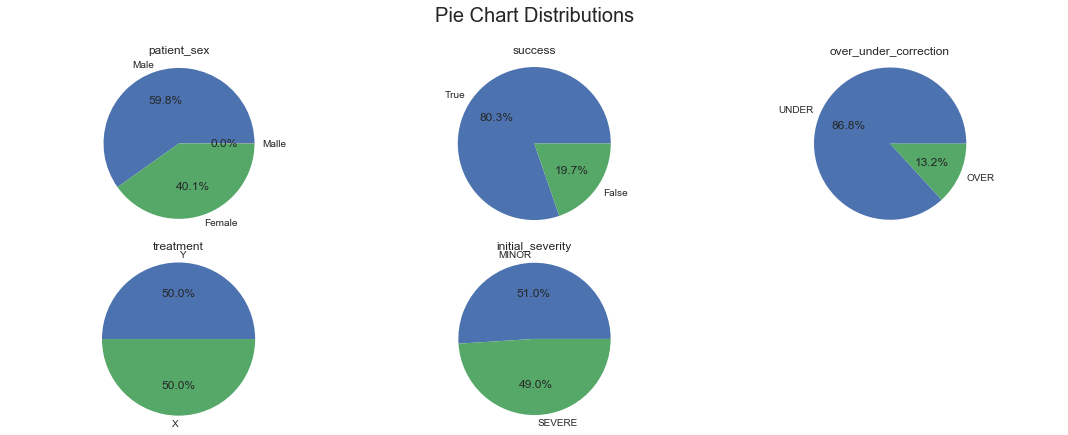

In [37]:
## Pie Plots

dataset2 = dataset.drop(columns = ['patient_insurance','age','surgeon_id'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(4, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [40]:
#Encoding Categorical Variables
dataset['success'] = dataset['success']*1
dataset['patient_sex'] = dataset['patient_sex'].map( {'Male':1, 'Female':0} )
dataset['initial_severity'] = dataset['initial_severity'].map( {'MINOR':1, 'SEVERE':0} )
dataset['over_under_correction'] = dataset['over_under_correction'].map( {'OVER':1, 'UNDER':0} ) 
dataset['treatment'] = dataset['treatment'].map( {'X':1, 'Y':0} ) 

In [41]:
dataset.head()

,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity,age
0,D,1.0,1,18,NaN,1,1,50
1,I,1.0,1,17,NaN,0,1,21
2,A,1.0,1,8,NaN,0,1,45
3,D,1.0,1,8,NaN,1,1,37
4,B,1.0,1,9,NaN,0,0,49


In [26]:
dataset.shape

(3500, 8)

In [27]:
dataset.isna().any() 

patient_insurance         True
patient_sex               True
success                  False
surgeon_id               False
over_under_correction     True
treatment                False
initial_severity         False
age                      False
dtype: bool

In [57]:
dataset = dataset.dropna(subset=['patient_insurance','patient_sex'])

In [58]:
dataset.isna().any() 

patient_insurance        False
patient_sex              False
success                  False
surgeon_id               False
over_under_correction     True
treatment                False
initial_severity         False
age                      False
dtype: bool

In [59]:
dataset.shape

(3496, 8)

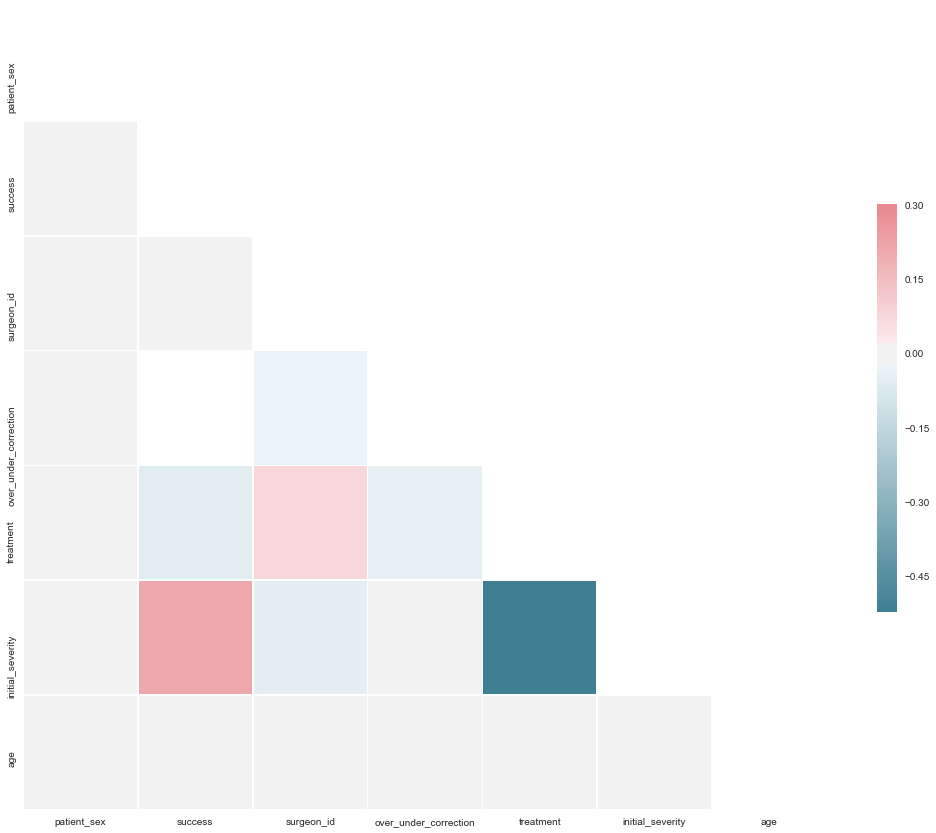

In [43]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



In [61]:
cols = ['patient_sex']
dataset[cols] = dataset[cols].applymap(np.int64)

/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [62]:
dataset['patient_sex'].dtype

dtype('int64')

In [74]:
dataset.head()

,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity,age
0,D,1,1,18,nan,1,1,50
1,I,1,1,17,nan,0,1,21
2,A,1,1,8,nan,0,1,45
3,D,1,1,8,nan,1,1,37
4,B,1,1,9,nan,0,0,49


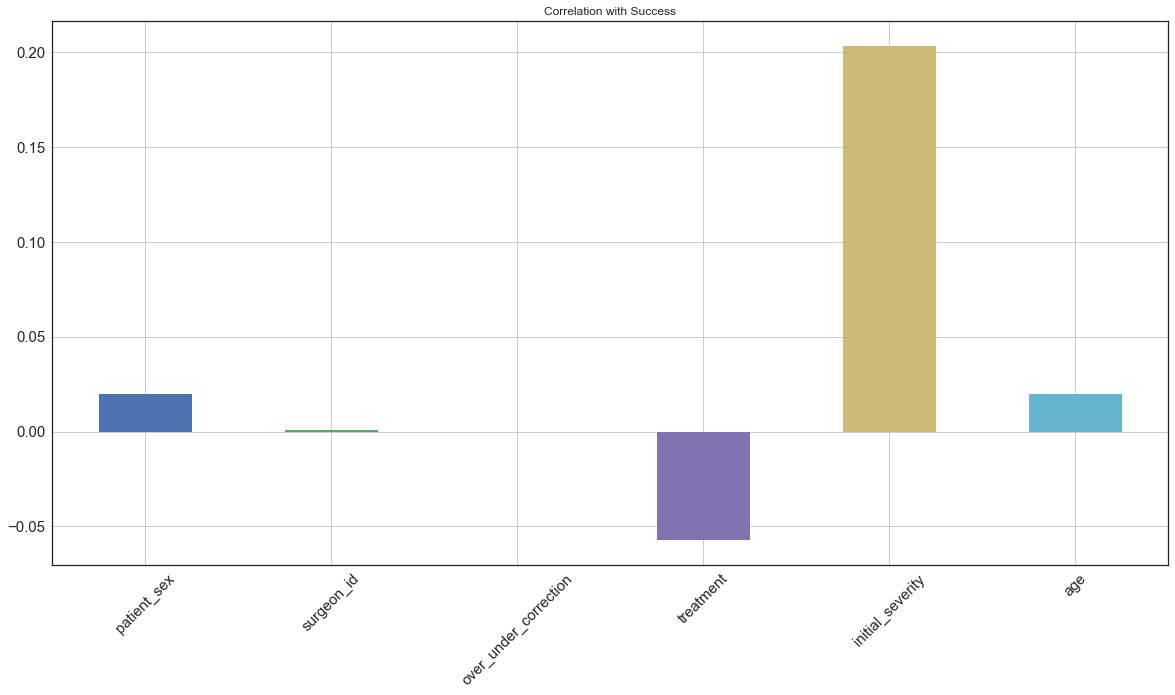

In [75]:
## Correlation with Response Variable (if success is response)
dataset1 = dataset.drop(columns = ['patient_insurance','success'])
dataset1.corrwith(dataset.success).plot.bar(
        figsize = (20, 10), title = "Correlation with Success", fontsize = 15,
        rot = 45, grid = True)

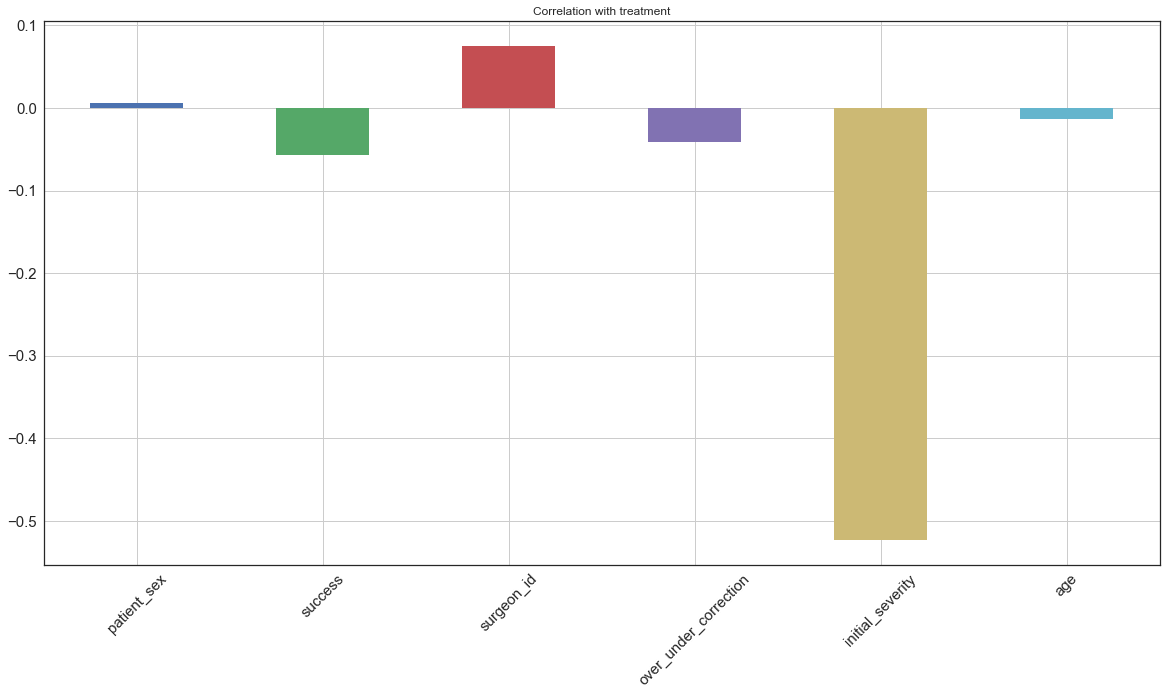

In [69]:
## Correlation with Response Variable (if treatment is response)
dataset2 = dataset.drop(columns = ['patient_insurance','treatment'])
dataset2.corrwith(dataset.treatment).plot.bar(
        figsize = (20, 10), title = "Correlation with treatment", fontsize = 15,
        rot = 45, grid = True)

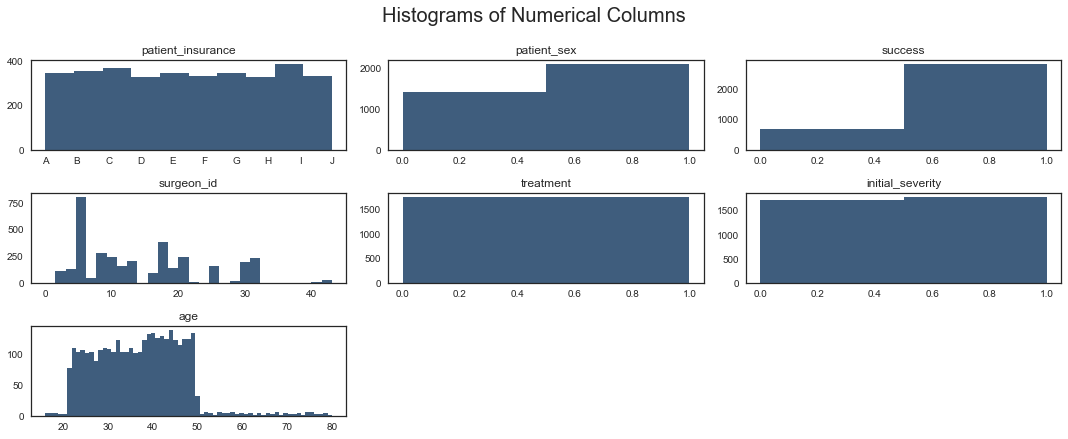

In [83]:
## Histograms

dataset2 = dataset.drop(columns = ['over_under_correction'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [84]:
dataset.to_csv('new_eye.csv', index = False)